<h1>Holdup Factor Correlation</h1>

I'm generally aware that the holdup factor correlation, which appears only graphically in Hagedorn & Brown, has been effectively modeled in later research. Rather than reproducing that effort myself, I'll rely on simple interpolation until I find and integrate those modeling results.

I digitized the curve from Fig. 13 of Hagedorn & Brown (SPE 940-pa) using the tool at: https://apps.automeris.io/wpd/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
os.getcwd()

'C:\\Users\\samue\\Documents\\GitHub\\hagedorn_brown'

In [2]:
# import the digitized data:
df = pd.read_csv('data/fig 13 holdup factor correlation.csv')
df

,x,y
0,0.000023,0.049589
1,0.000026,0.054024
2,0.000029,0.060516
3,0.000032,0.065609
4,0.000037,0.072266
...,...,...
66,0.033890,0.956700
67,0.038173,0.963192
68,0.042997,0.969438
69,0.048420,0.973296


<AxesSubplot:xlabel='x', ylabel='y'>

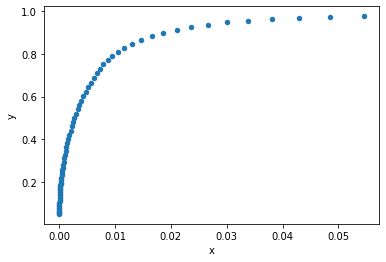

In [3]:
# plot in linear space (the original is log-x):
df.plot.scatter(x='x', y='y')

In [28]:
# create the test x points:
x = np.linspace(df['x'].min(), 8e-4, 100).tolist()

# condition the x & y values from the digitized data for np.interp:
xp = df['x'].values.T.tolist()
fp = df['y'].values.T.tolist()

In [44]:
# result a list of interpolated y values:
y = np.interp(x, xp, fp).tolist()

### Sense check to see the interpolation working:

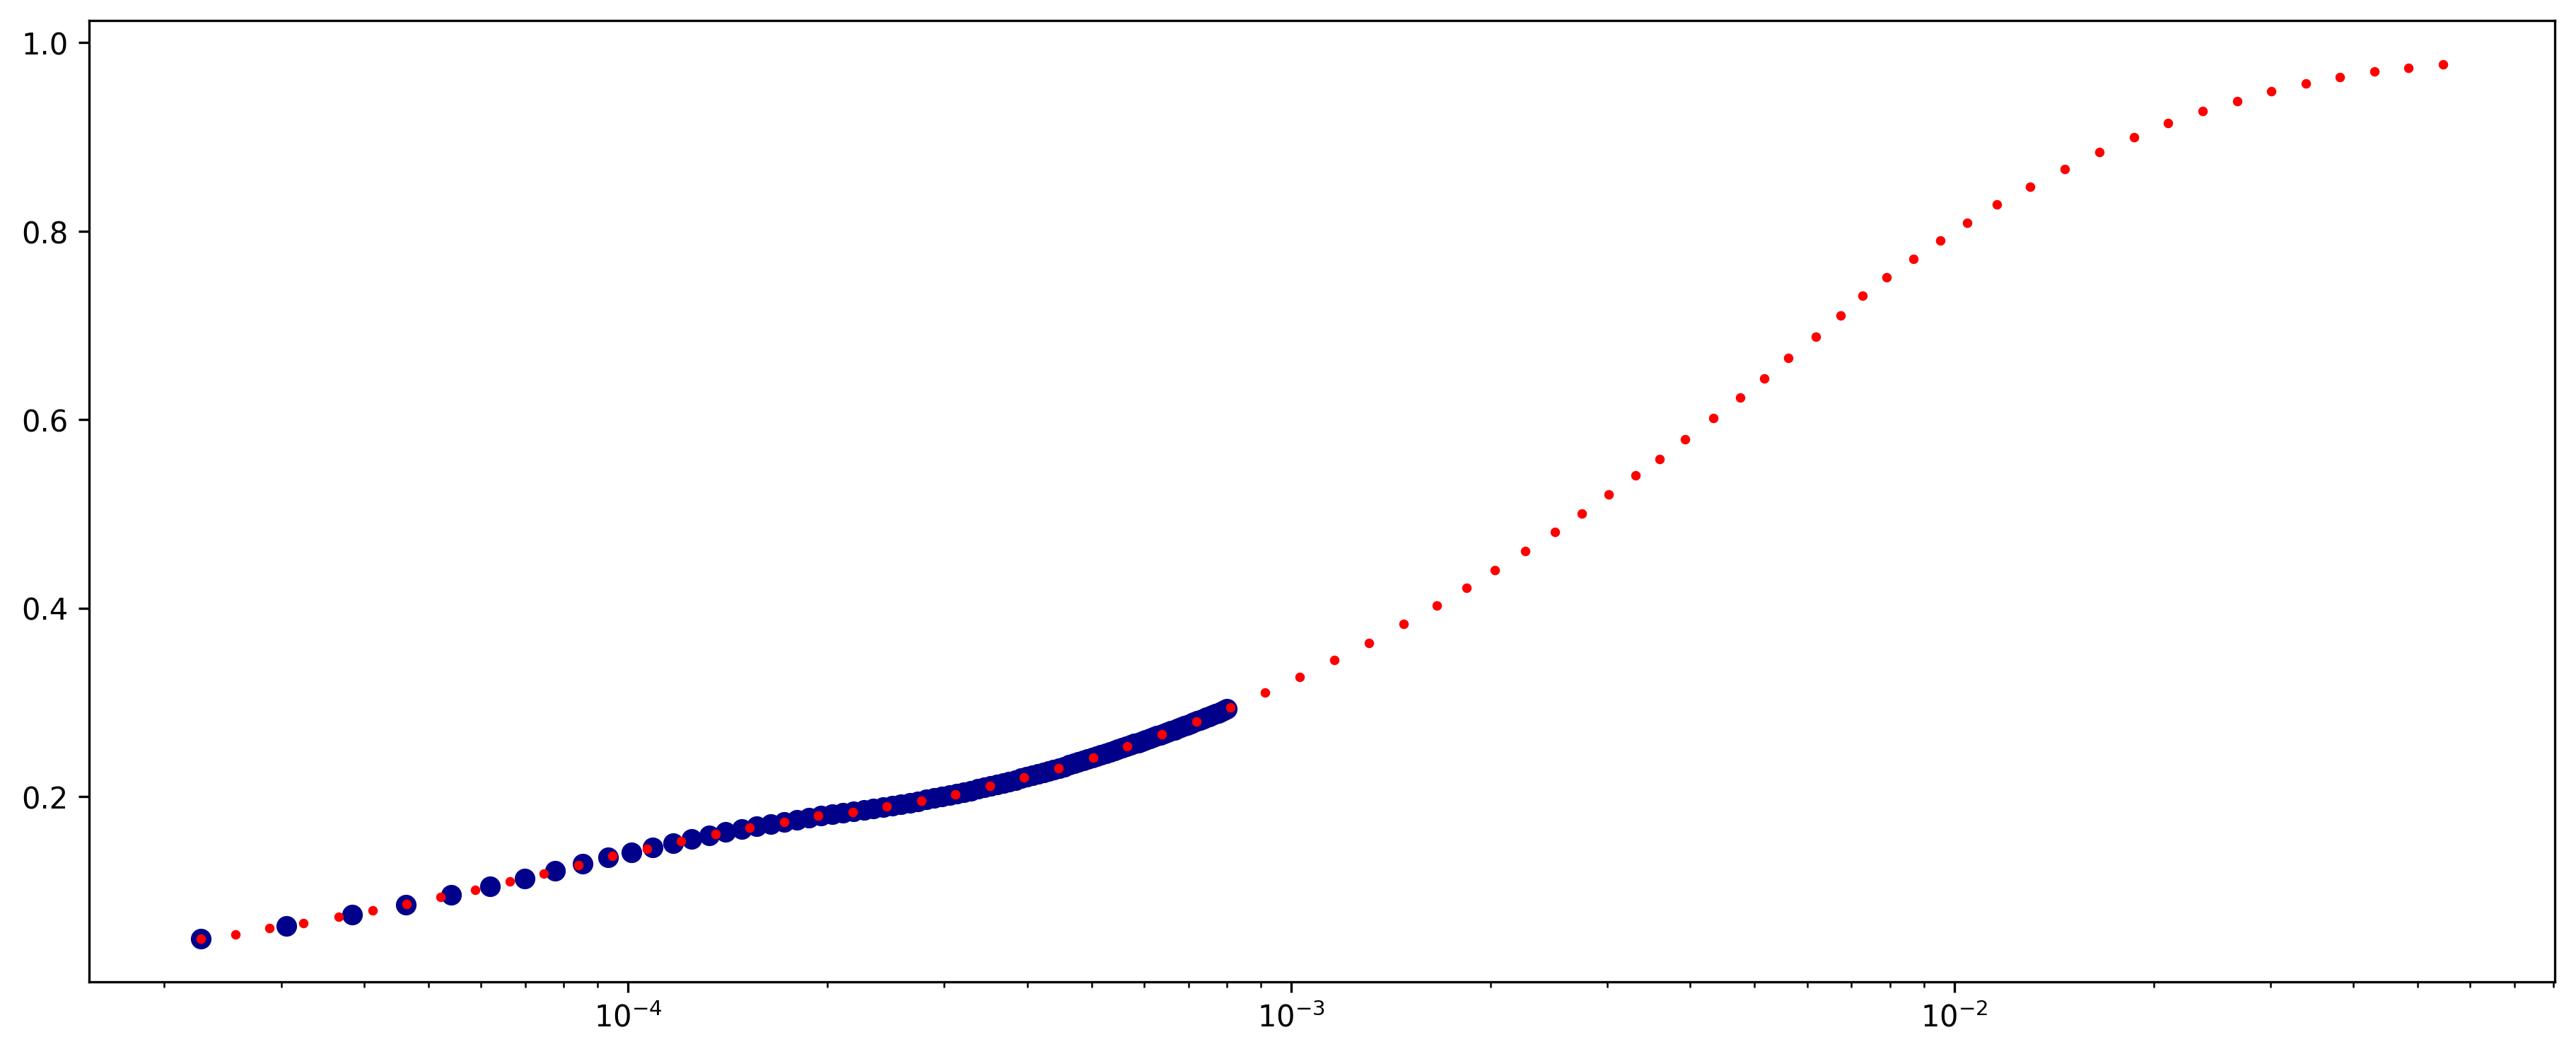

In [45]:
plt.figure(figsize=(15,6), dpi=300)

# plot the interpolated points:
plt.scatter(x, y, c='darkblue')

# plot the digitized points:
plt.scatter(df['x'], df['y'], s=5, c='r')

# log x scale, as per original figure:
plt.xscale('log')

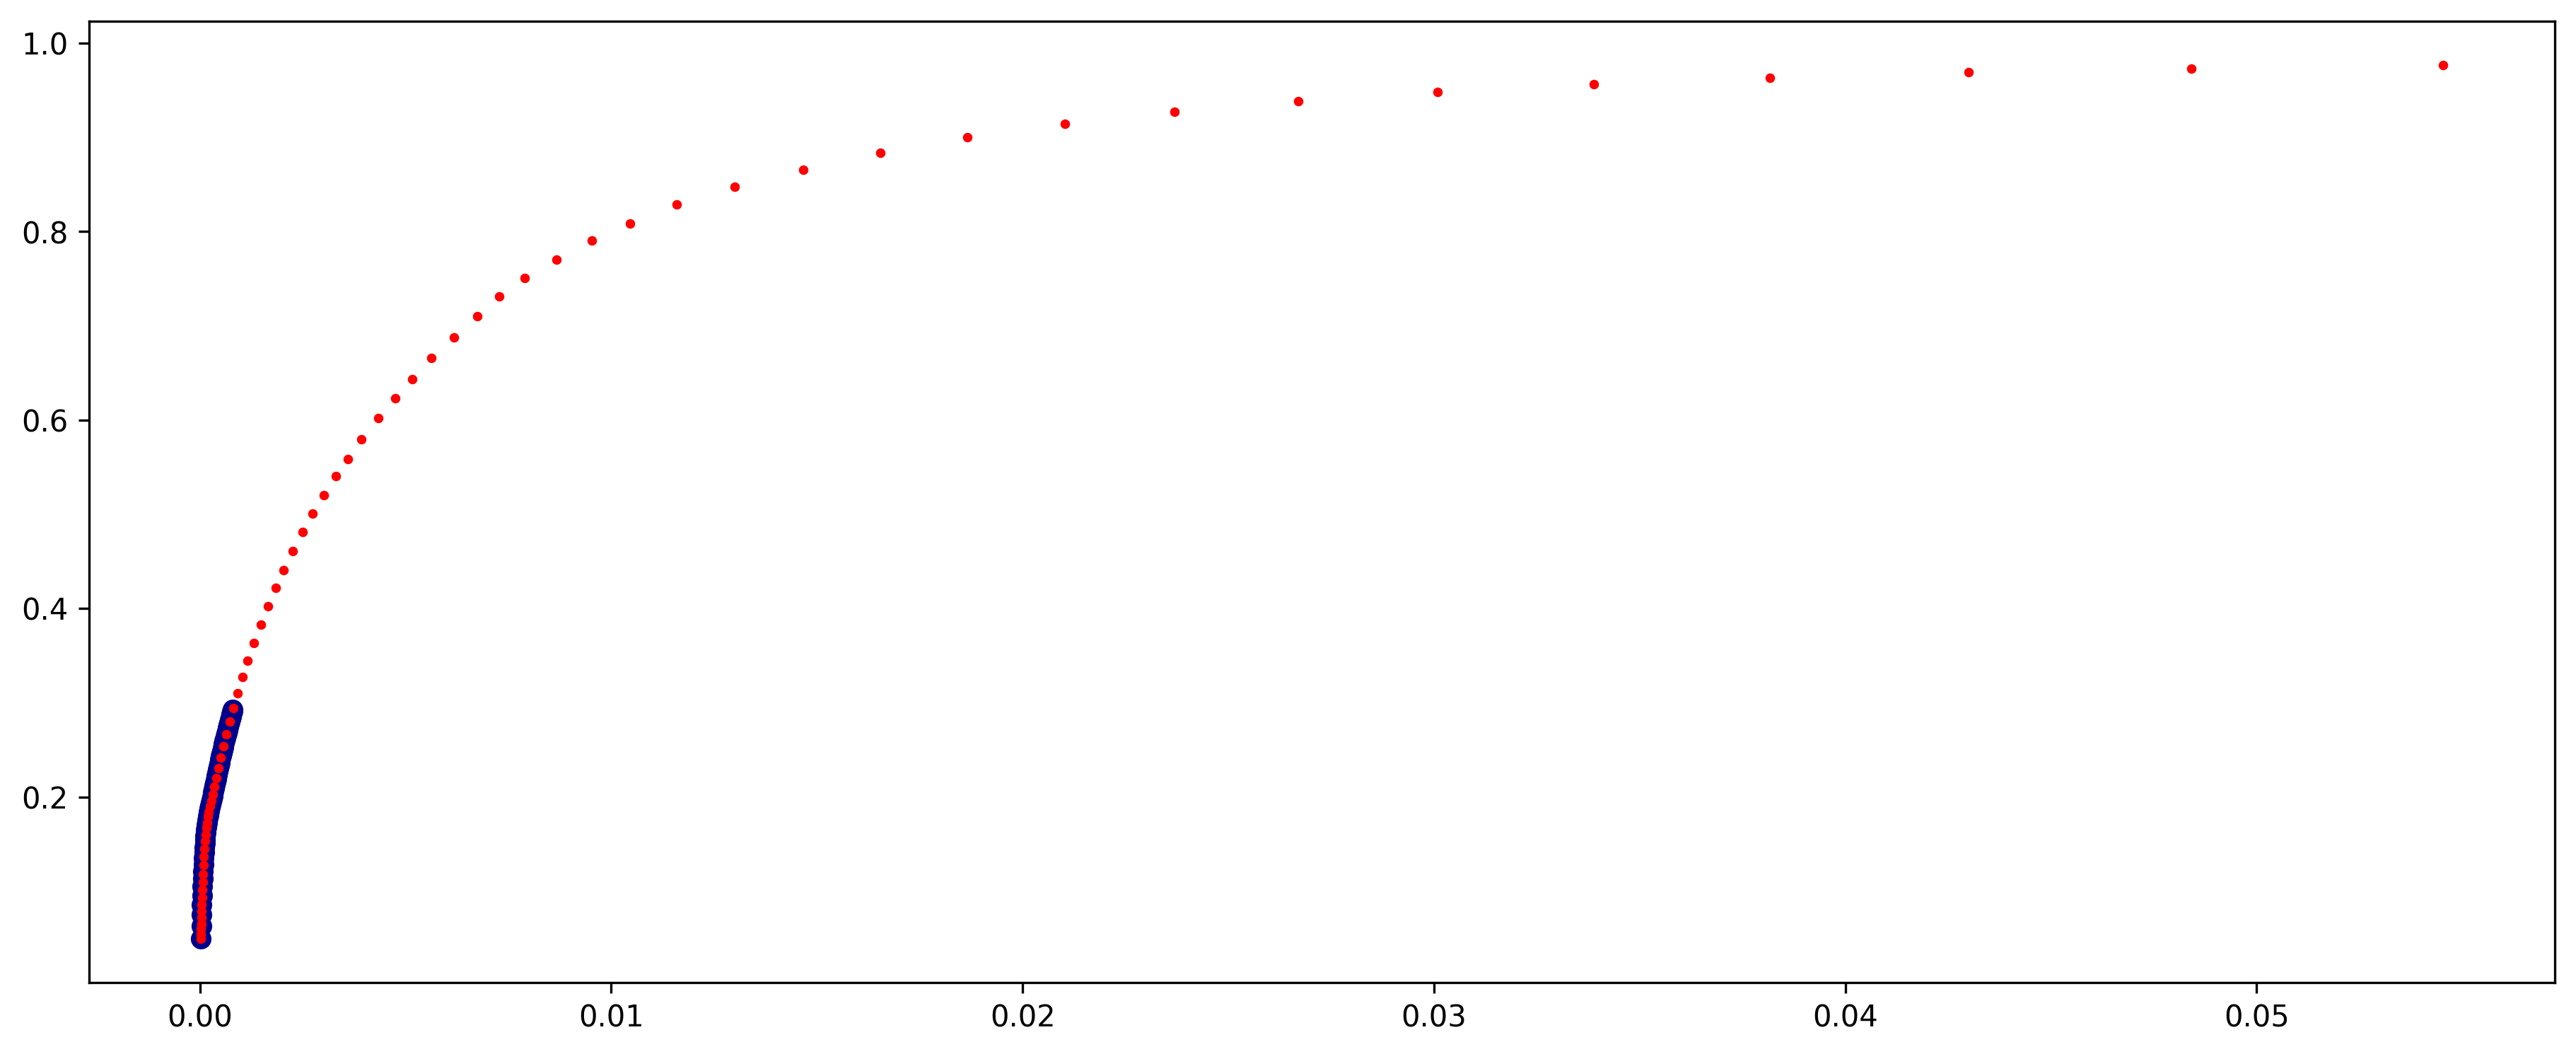

In [46]:
# same figure in linear scale:

plt.figure(figsize=(15,6), dpi=300)
plt.scatter(x, y, c='darkblue')
plt.scatter(df['x'], df['y'], s=5, c='r')

### So I'll make a JSON object to store the digitized x & y:

In [47]:
import json

In [89]:
# arrange the digitized data into a dictionary:
xy = dict(zip(x,y))

In [73]:
# format as json:
fig13 = json.dumps(xy)

In [95]:
# write to json:
with open('data/holdup_factor_points.json', 'w') as f:
    json.dump(data, f)

In [96]:
# test load:
with open('data/holdup_factor_points.json', 'r') as f:
    loaded = json.load(f)

In [97]:
# confirm that the data match:
loaded[0] == xp and loaded[1] == fp

True